In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle


In [2]:
## Load the Dataset
df =  pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# shape of the data
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
## categorical data
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [7]:
## categorical data
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

### Data Cleaning

In [8]:
## Dropping irrelevant features or columns
df.drop(columns=['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Univariate analysis (numerical columns)

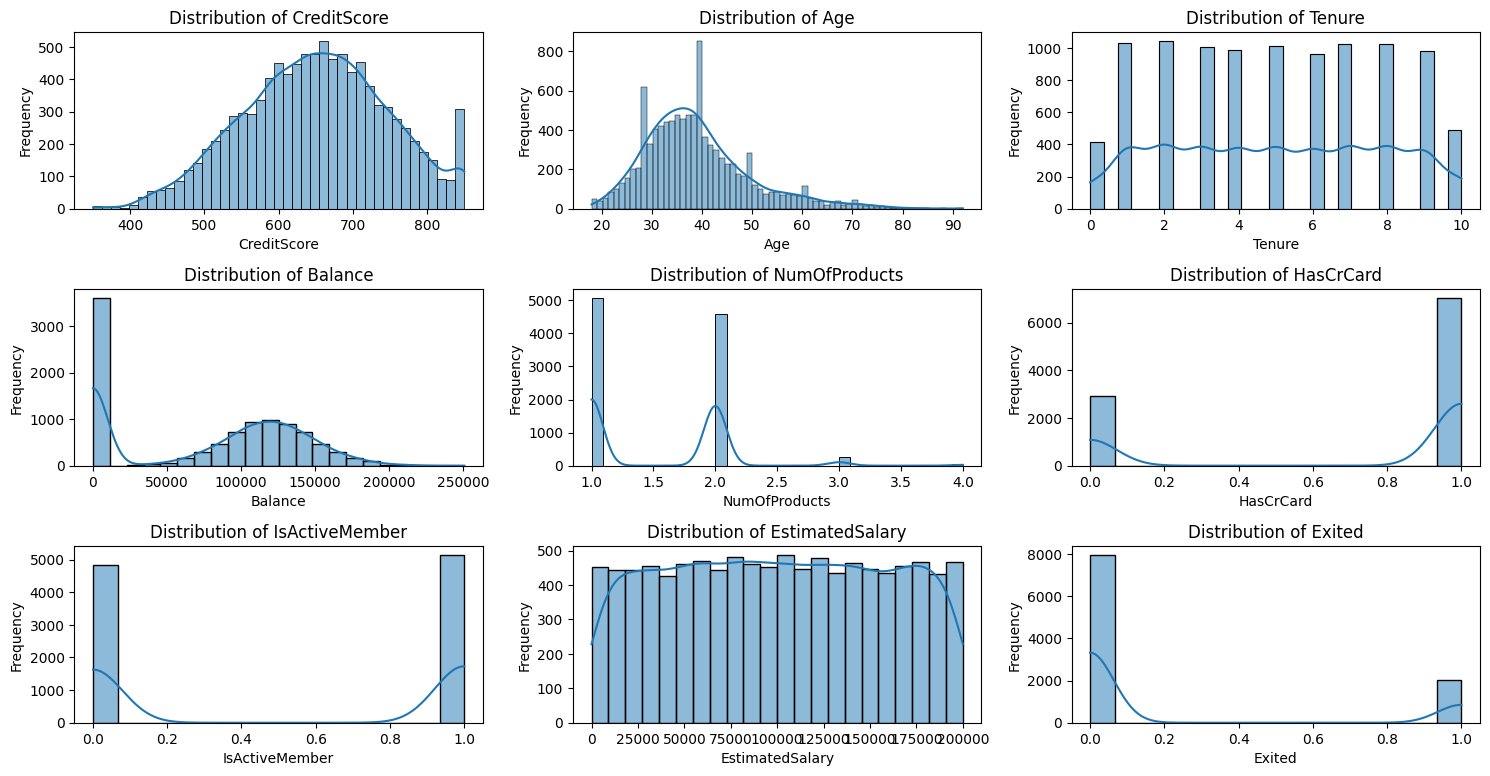

In [10]:
## skewness analysis of all the numerical columns
numerical_columns = df.select_dtypes(exclude='object').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)  # Adjust grid layout
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Axes: >

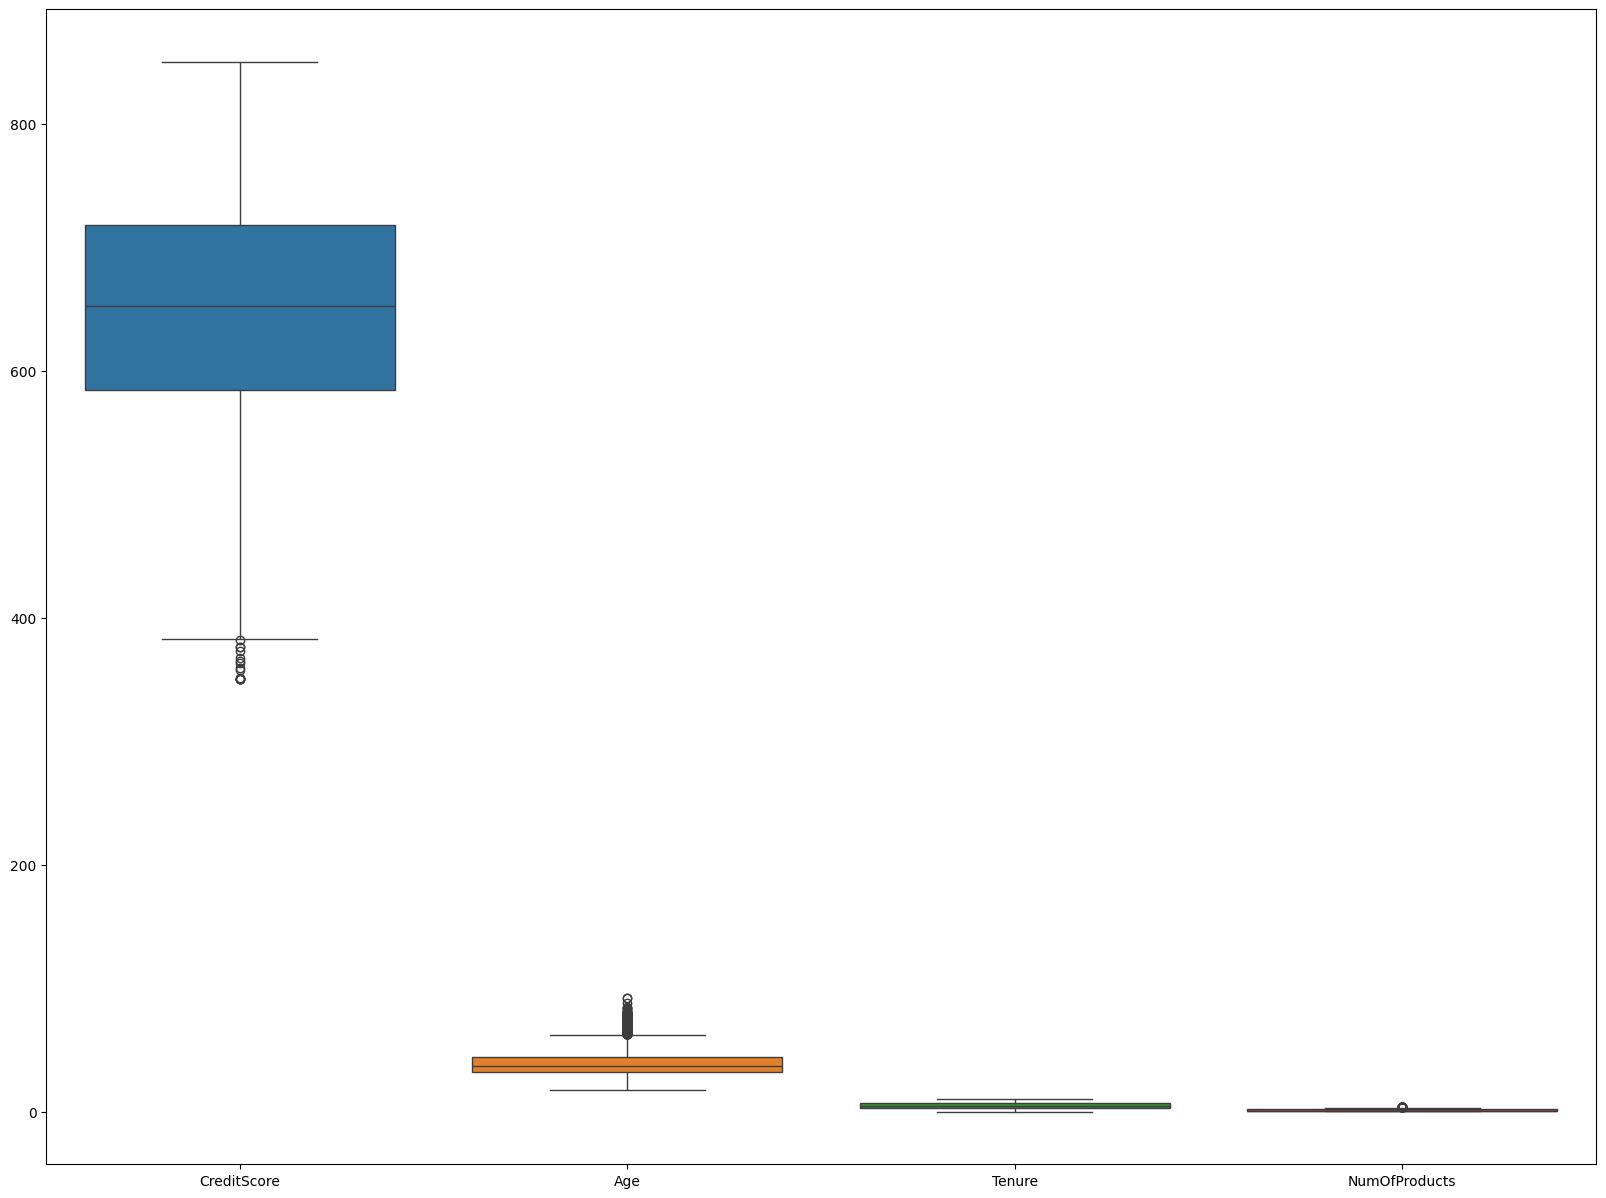

In [11]:
## Boxplotting for outlier analysis
cols1 = ['CreditScore','Age','Tenure','NumOfProducts'] #since balance and estimated salary has tooo large values lets analyze them seperately.

fig, ax = plt.subplots(figsize= (20,15))
sns.boxplot(data=df[cols1], ax=ax)


<Axes: >

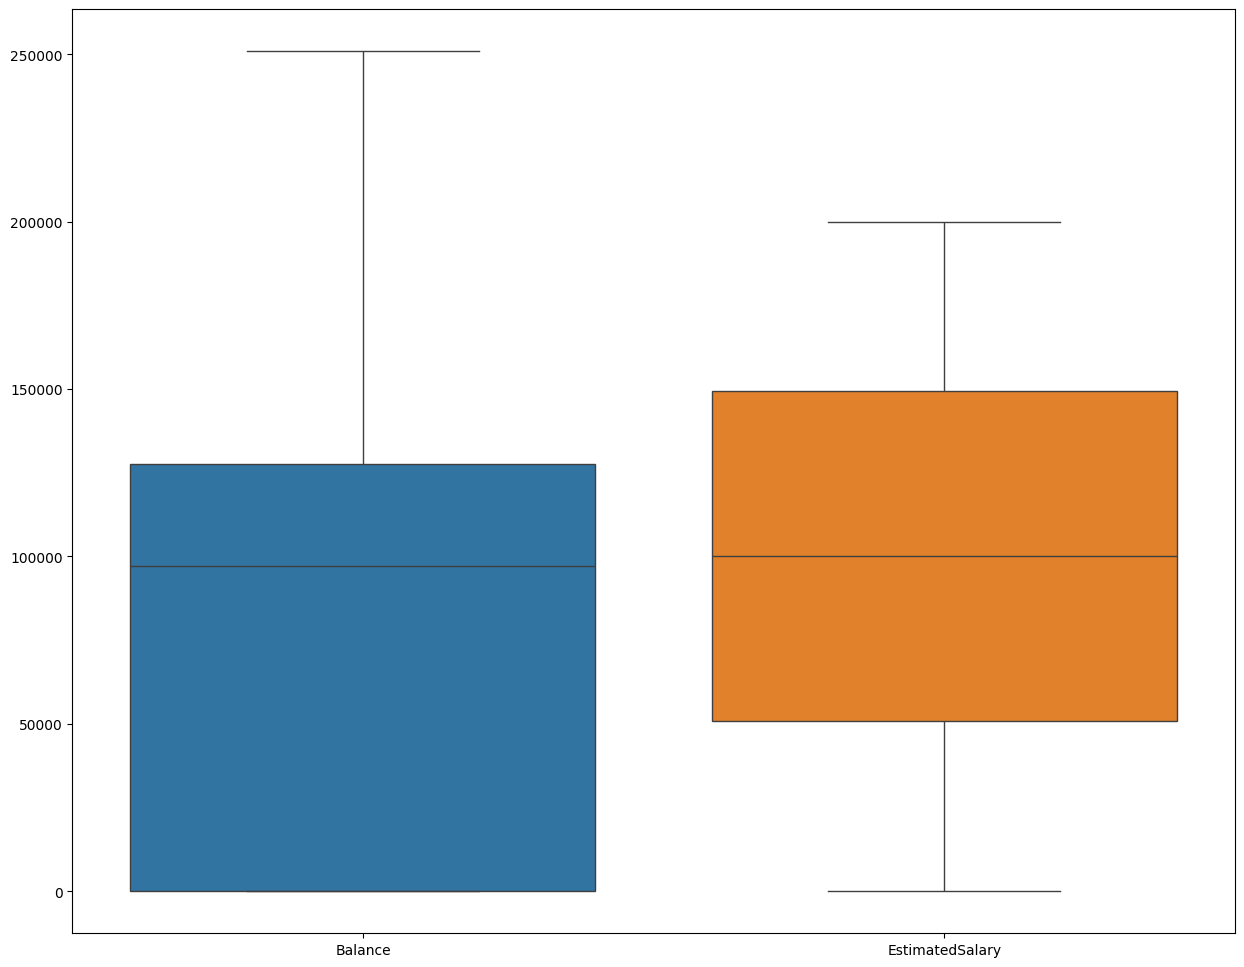

In [12]:
## Boxplotting for outlier analysis
cols2 = ['Balance','EstimatedSalary'] #since balance and estimated salary has tooo large values lets analyze them seperately.

fig, ax = plt.subplots(figsize= (15,12))
sns.boxplot(data=df[cols2], ax=ax)


### Insights

- The distributions are most probably normally distributed (age being a slight right skewed and also having some outlier which is acceptable.)
- no serious outliers present in the data

#### a brief univariate analysis of the numerical features
- CreditScore: Most customers have a credit score between 600 and 700.
- Age: The majority of customers are in their 30s and 40s, with a skew toward younger ages.
- Tenure: Tenure is uniformly distributed across values, indicating no preference in customer tenure duration.
- Balance: Many customers have zero balance, with a significant distribution between 100,000 and 150,000.
- NumOfProducts: Most customers use either 1 or 2 products, with very few using more than 2.
- HasCrCard: A majority of customers have a credit card (value 1).
- IsActiveMember: Customers are almost evenly split between active and inactive membership.
- EstimatedSalary: Salaries are evenly distributed, showing no clear concentration.
- Exited: Most customers did not exit, indicating a low churn rate.

## Univariate analysis (Categorical columns)

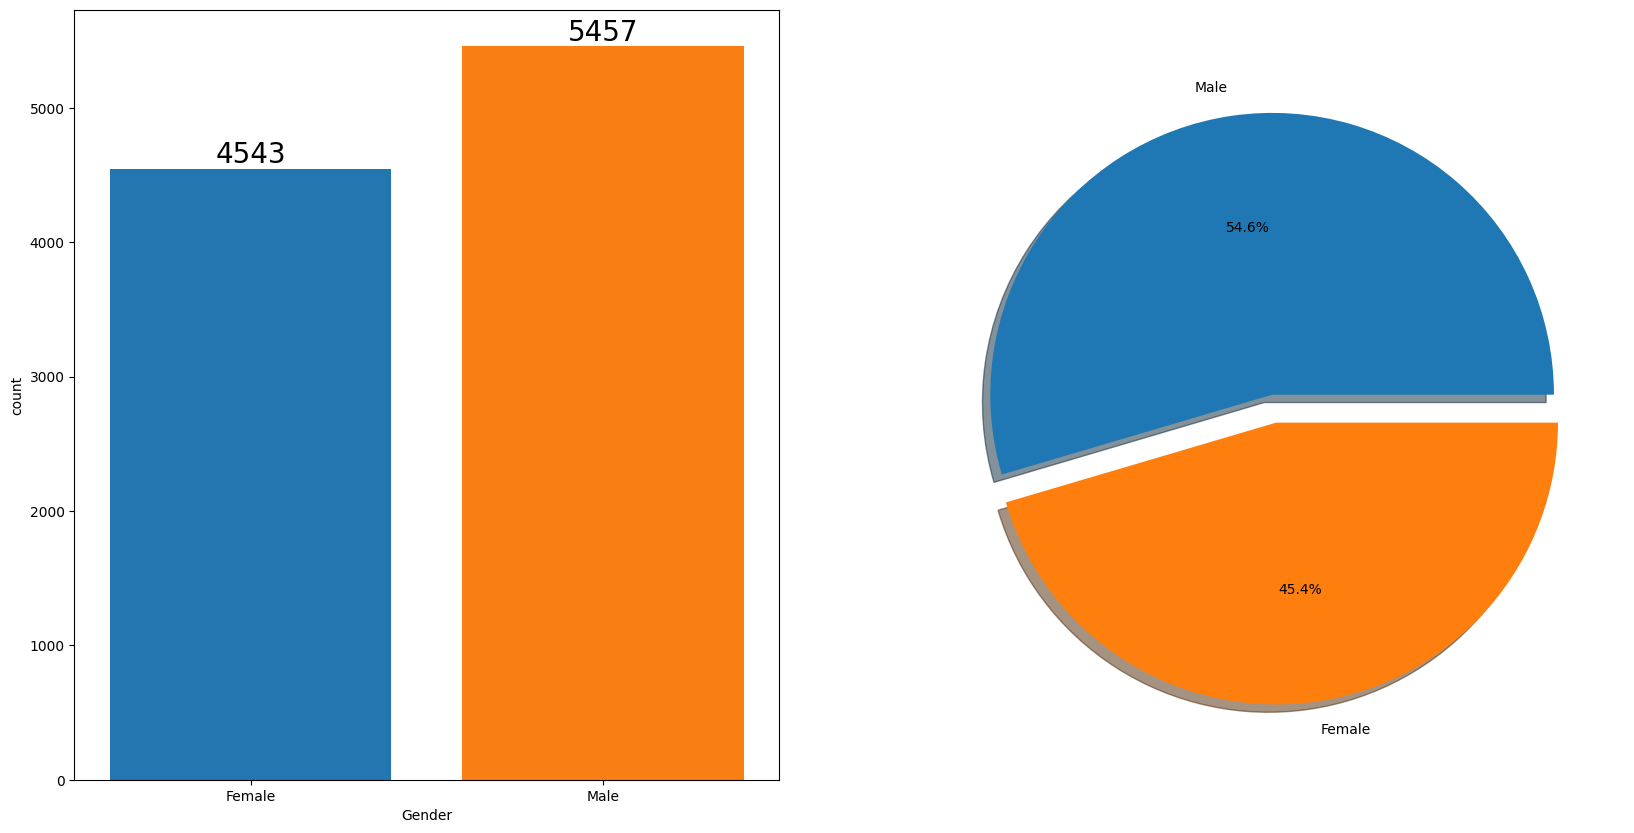

In [13]:
## countplot and pie chart for gender feature

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Gender'],data=df,hue=df['Gender'],ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

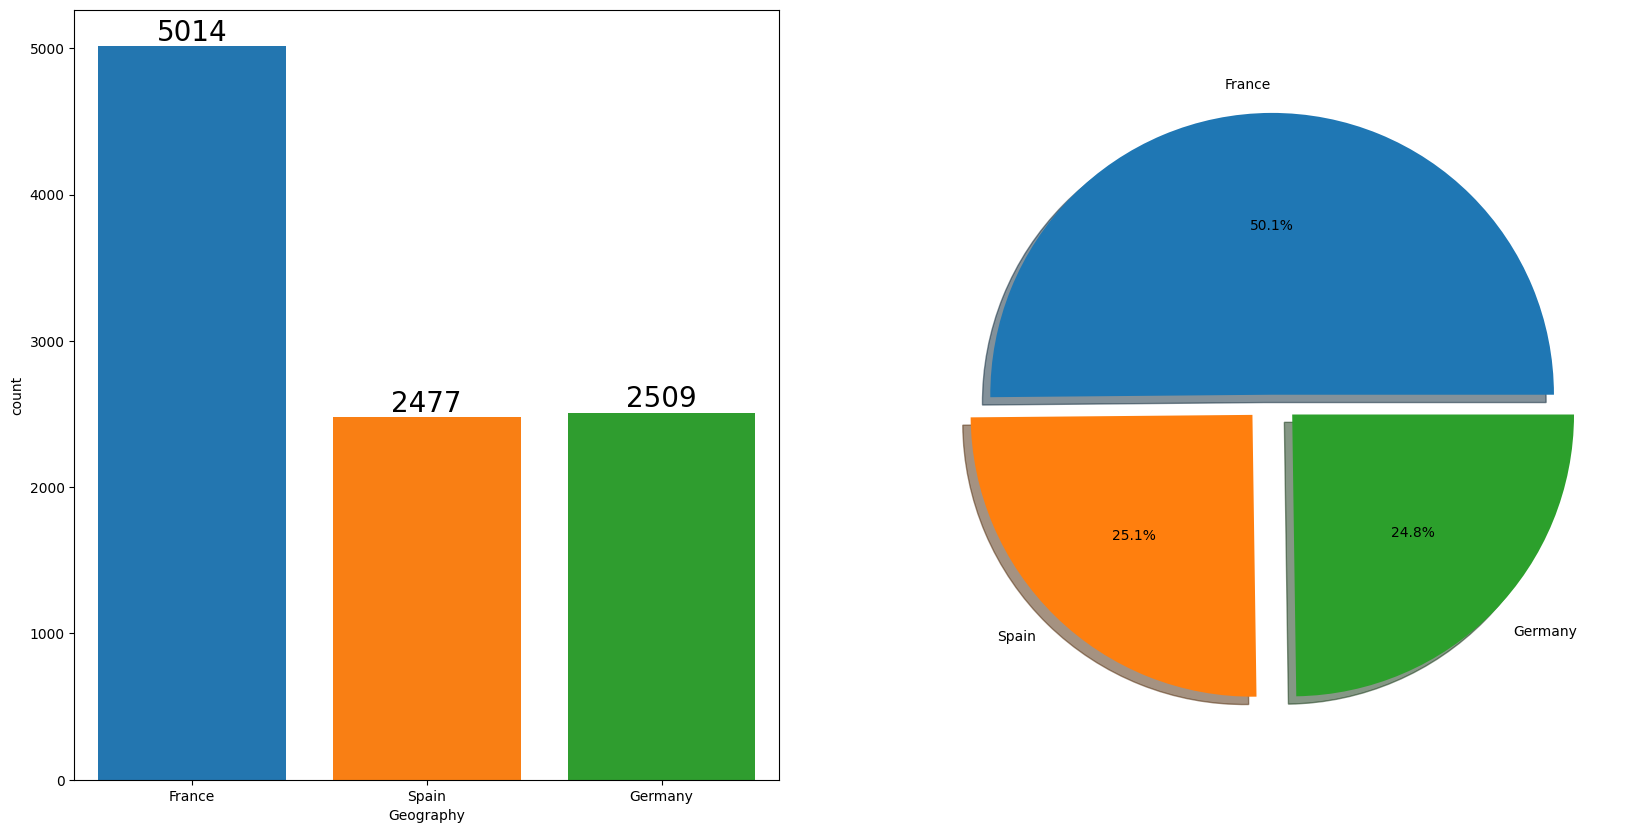

In [14]:
## countplot and pie chart for Geographical analysis
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Geography'],data=df,hue=df['Geography'],ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Geography'].value_counts(),labels=['France', 'Spain', 'Germany'],explode=[0,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

## Insights

- Geography:

    France has the highest number of customers (50.1%), followed by Germany (25%) and Spain (24.8%).

- Gender:

    There are slightly more male customers (54.6%) compared to female customers (45.4%).

## Bivariate analysis

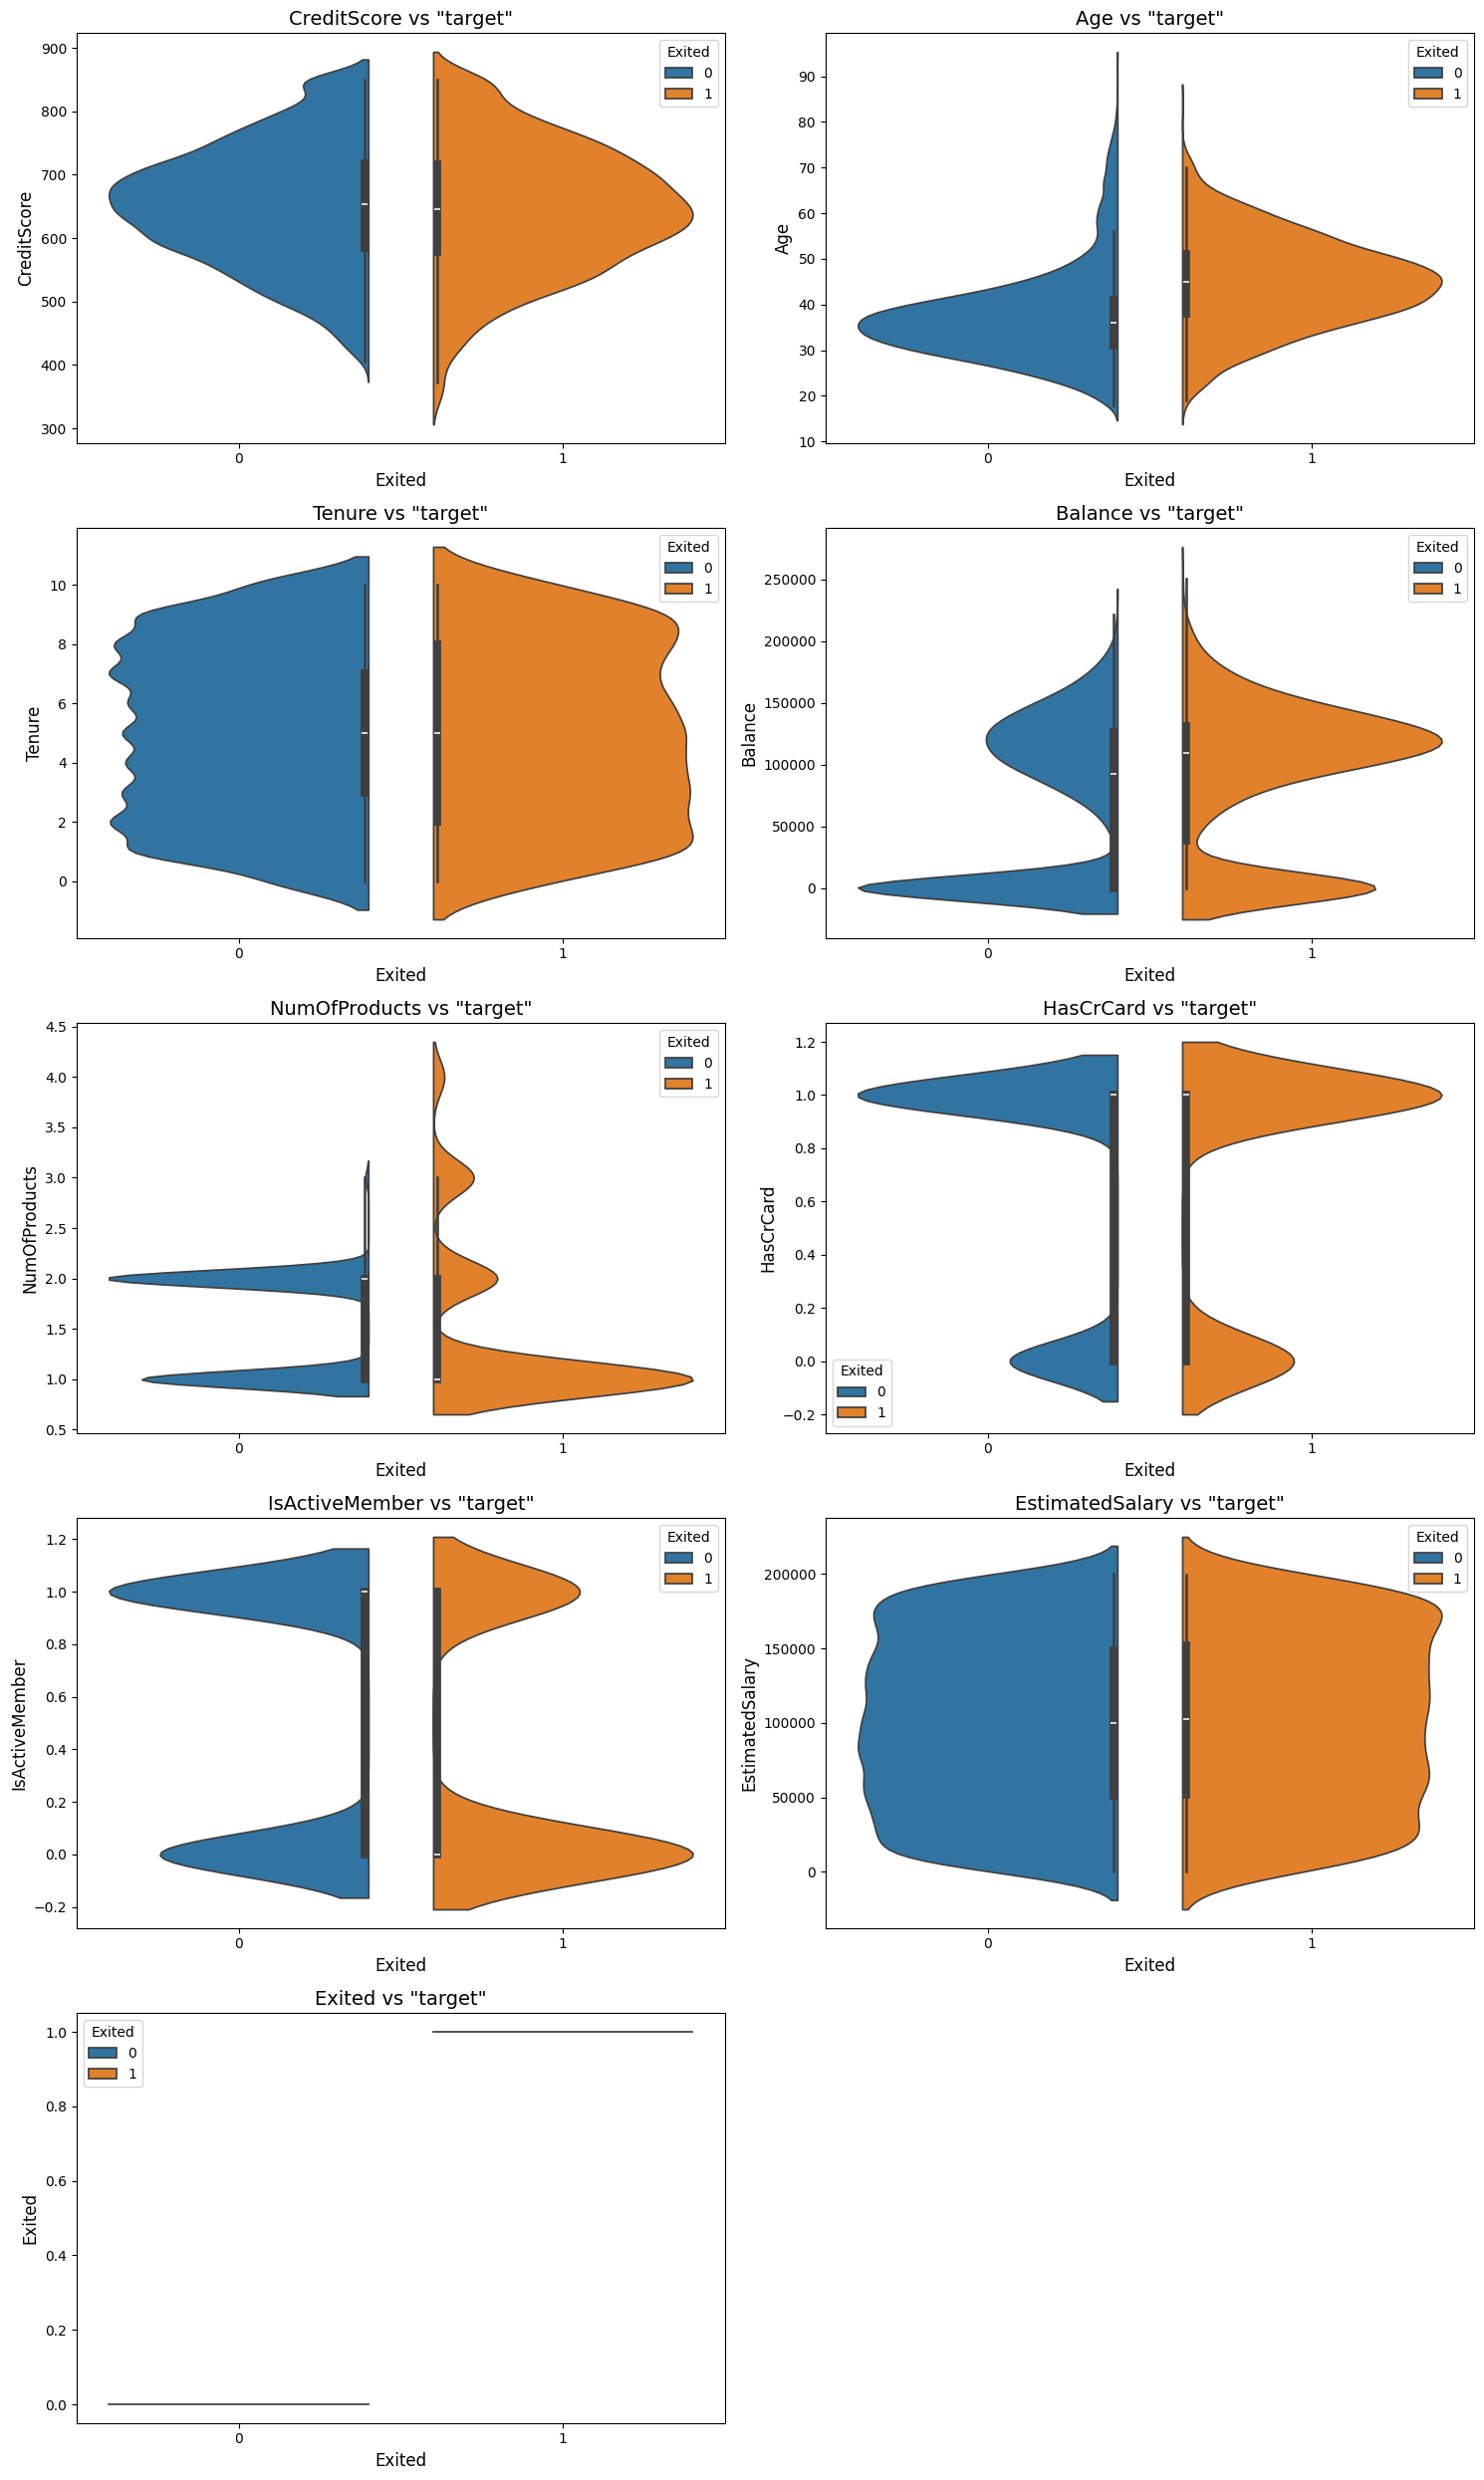

In [15]:
# Numerical columns vs Target (Exited):
# Create subplots
n_cols = 2  # Number of columns in the grid
n_rows = (len(numerical_columns) + 1) // n_cols  # Calculate rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numerical feature using Violin Plots
for i, col in enumerate(numerical_columns):
    sns.violinplot(x=df['Exited'], y=col, data=df, ax=axes[i], hue=df['Exited'], split=True)
    axes[i].set_title(f'{col} vs "target"', fontsize=14)
    axes[i].set_xlabel('Exited', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Insights

- CreditScore vs Exited: Churned customers generally have slightly lower credit scores compared to non-churned customers.
- Age vs Exited: Older customers are more likely to churn, with churn increasing significantly beyond age 40.
- Tenure vs Exited: Tenure distribution is similar for both churned and non-churned customers, showing no clear trend.
- Balance vs Exited: Churned customers tend to have higher account balances compared to non-churned customers.
- NumOfProducts vs Exited: Churn is more prevalent among customers with fewer products, especially those with only one product.
- HasCrCard vs Exited: Credit card ownership does not significantly differentiate churned and non-churned customers.
- IsActiveMember vs Exited: Inactive members show a much higher likelihood of churn compared to active members.
- EstimatedSalary vs Exited: Estimated salary shows no significant difference between churned and non-churned customers.

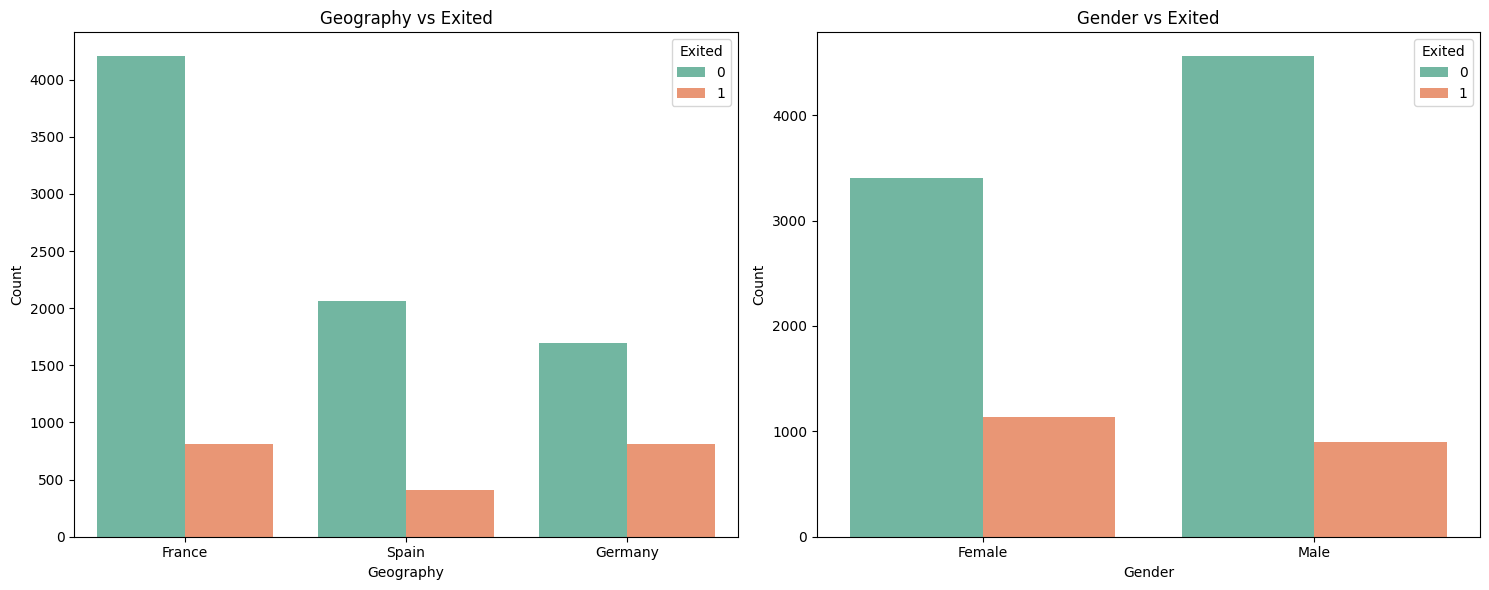

In [16]:
## Categorical vs Target
cat_cols = df.select_dtypes(include = 'object').columns

# Create subplots
fig, axes = plt.subplots(1, len(cat_cols), figsize=(15, 6))  # Adjust number of subplots dynamically

# Plot each categorical column vs target
for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], hue=df['Exited'], data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(f'{col} vs Exited')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

## Insights

- Geography vs Exited: 
    Customers from Germany have a higher proportion of churn compared to France and Spain.
- Gender vs Exited: 
    Female customers churn at a higher rate compared to male customers.

## Multivariate Analysis

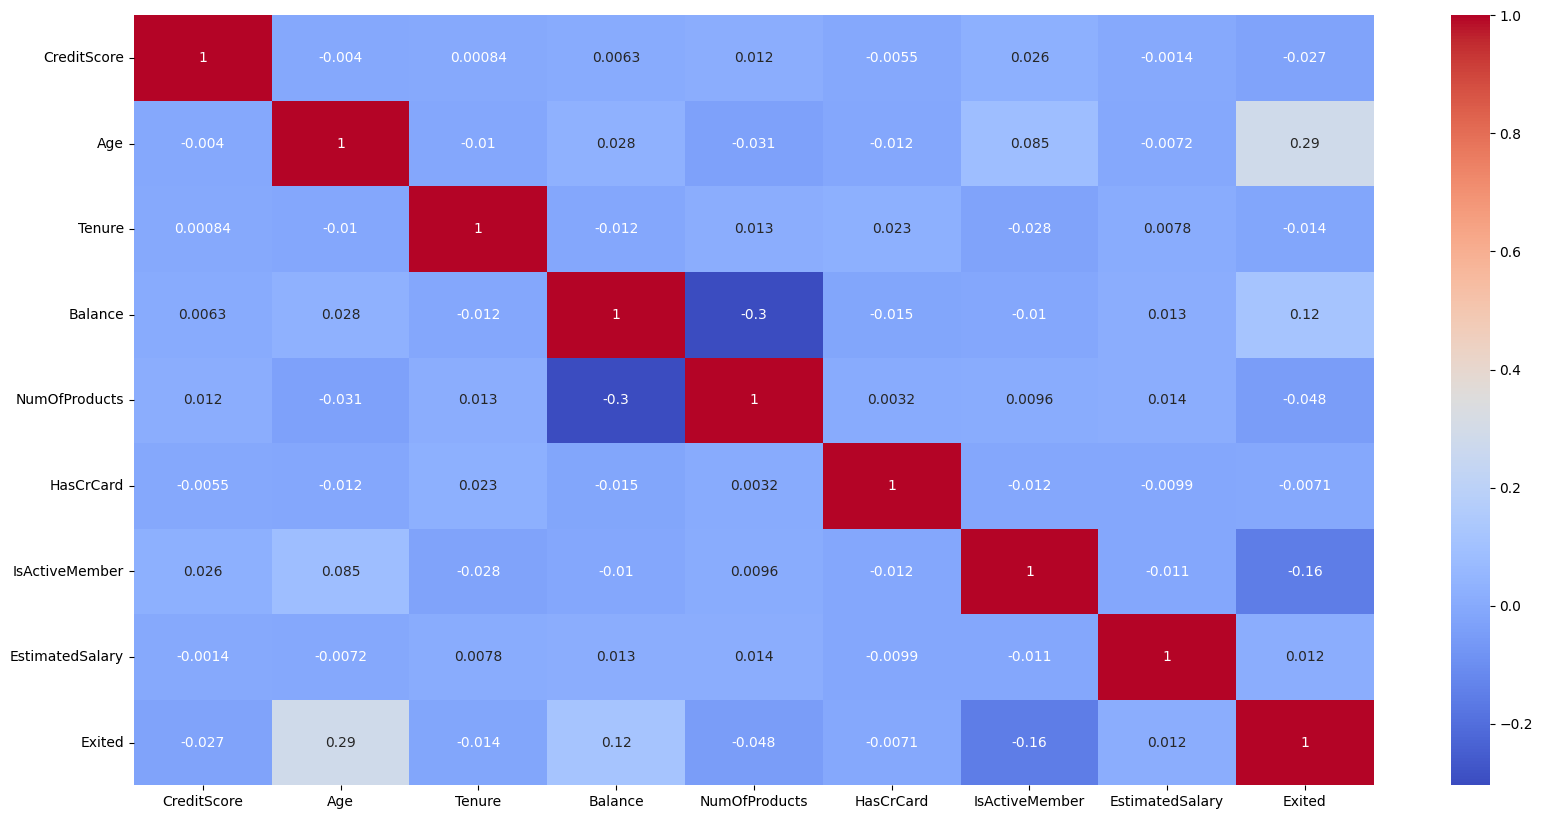

In [17]:
# using heat map for multi variate analysis
plt.figure(figsize=(20,10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

## Insight

No significant correlation among the numerical columns

## Encoding categorical Variables

In [18]:
## LabelEncoder
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

In [19]:
## Onehot Encode Geography column
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder()
geo_encoded = OH_encoder.fit_transform(df[['Geography']])
geo_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [20]:
OH_encoder.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [21]:
geo_encoded_df =pd.DataFrame(geo_encoded.toarray(), columns=OH_encoder.get_feature_names_out(['Geography']) )
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [22]:
df = pd.concat([df.drop(columns=['Geography']), geo_encoded_df], axis = 1)

In [23]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [24]:
## Save the encoders and scaler
with open('label_encoder_gender.pkl','wb')as file:
    pickle.dump(label_encoder_gender,file)

with open('OH_encoder.pkl','wb')as file:
    pickle.dump(OH_encoder, file)

In [25]:
## Divide the dataset into independent and dependent features
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [26]:
## Divide the dataset into independent and dependent features
X = df.drop(columns='Exited', axis = 1)
y = df['Exited']

In [27]:
## Splitting the data into training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20)

In [28]:
## Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
## Save the encoders and scaler
with open('label_encoder_gender.pkl','wb')as file:
    pickle.dump(label_encoder_gender,file)

with open('OH_encoder.pkl','wb')as file:
    pickle.dump(OH_encoder, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## ANN Implementation

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [31]:
## Build our AN model
model = Sequential([
    Dense(64, activation='relu',input_shape=(X_train.shape[1],)), ## HL1 Conected with input layer
    Dense(32, activation='relu'),## HL2
    Dense(1,activation='sigmoid') ## Output layer
]
)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy()

In [34]:
## compile the model
model.compile(optimizer=opt,loss=loss, metrics = ['accuracy'])

In [35]:
## Set up the Tensorboard
log_dir = "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [36]:
## Setup Early Stopping (it is basically to stop the model early for efficient computational load)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights=True)

In [37]:
## Training the modell
history = model.fit(
    X_train,y_train, validation_data=(X_test,y_test), epochs=100,
    callbacks = [tensorflow_callback, early_stopping_callback]
)

Epoch 1/100


250/250 [==============================] - 10s 14ms/step - loss: 0.3894 - accuracy: 0.8405 - val_loss: 0.3653 - val_accuracy: 0.8445
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3547 - accuracy: 0.8594 - val_loss: 0.3467 - val_accuracy: 0.8530
Epoch 3/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3479 - accuracy: 0.8574 - val_loss: 0.3466 - val_accuracy: 0.8500
Epoch 4/100
250/250 [==============================] - 3s 14ms/step - loss: 0.3471 - accuracy: 0.8599 - val_loss: 0.3471 - val_accuracy: 0.8490
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3390 - accuracy: 0.8620 - val_loss: 0.3575 - val_accuracy: 0.8370
Epoch 6/100
250/250 [==============================] - 3s 13ms/step - loss: 0.3377 - accuracy: 0.8640 - val_loss: 0.3396 - val_accuracy: 0.8605
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3356 - accuracy: 0.8629 - val_loss: 0.3519 - val_accuracy:

In [38]:
model.save('model.h5')

e:\Machine learning END to END project\customer_exit_project\DLenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
## load Tensorboard Extension
%load_ext tensorboard

In [41]:
%tensorboard --logdir logs\fit

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.